# import Libraries and Datasets

The starting of any model requires a set of data. in this project, the event organizer has provided us a dataset of all the customers in csv format. so, first we will import the dataset and then we will perform various operations on that.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
loan= pd.read_csv('PL Risk.csv')

In [4]:
loan.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30
0,1,0,0,24.0,0,57000.0,2120.0,2432.0,46500.0,24.0,...,NaN,0,1,2,0,0,0,NaN,NaN,0
1,2,0,1,24.0,1,33150.0,1461.0,1495.0,28168.0,24.0,...,NaN,0,1,2,0,0,0,NaN,NaN,0
2,3,0,0,26.0,0,56000.0,2745.0,1707.0,38900.0,30.0,...,55000.0,0,7,8,16,31,44,15000.0,50000.0,0
3,4,0,0,24.0,0,49000.0,8003.0,2128.0,42900.0,24.0,...,NaN,0,1,3,0,0,0,NaN,NaN,0
4,5,0,0,27.0,0,54000.0,1852.0,1824.0,40900.0,30.0,...,NaN,0,1,1,0,0,0,NaN,NaN,0


# Separate the columns based on their features type

**Categorical features**
*These features have categories*
* V1: Customer's ID
* V2: First EMI Bounce (0 : No, 1: Yes) (existing loan)
* V11: Customer's Geographical Area Code
* V12: Customer's TW Dealer's Code
* V13: Customer's TW Model’s Code
* V15: Gender
* V16: Employment type of customer (SAL: Salaried, SELF: Self-employed, HOUSEWIFE, PENS: Pensioner, STUDENT)
* V17: Pin code
* V18: date of birth
* V30: Target variable ( 1: Bad Customer / 0: Good Customer)


**Numerical features**
*These features have numerical values*

* V3: Number of bounces in last 3 months Outside TVS Credit
* V4: MOB (Month of business with TVS Credit)
* V5: Number of bounces with TVS Credit
* V6: Cost of Asset (existing loan)
* V7: Total down payment of existing loan
* V8: EMI of existing loan
* V9: Total Loan amount of existing loan
* V10: Tenure of existing loan
* V14: Rate of interest for existing loan
* V19: no. of live loans
* V20: Number of Two Wheeler loans
* V21: Maximum sanction amount of Live Loans
* V22: Number of new loans taken in last 3 months (but this column is filled with only 0, so not useful)
* V23: Number of closed loans
* V24: Number of enquiries
* V25: Number of times defaulted in last 3 months
* V26: Number of times defaulted in last 6 months
* V27: Number of times defaulted in last 12 months
* V28 Maximum loan amount sanctioned for any Gold loan
* V29: Maximum loan amount sanctioned for any personal loan




# Checking the Data

We imported data, to perform various operations and to know the kind of data that we are dealing with. so, let's check the data and its type, statistical summary, shape, size, null values and some other things shown below.

remove irrelevant columns and column V22 (because it contains only 0)

In [5]:
irr_col= ['V1', 'V12', 'V13', 'V17', 'V22']

In [6]:
loan= loan.drop(irr_col,axis=1)

<AxesSubplot:>

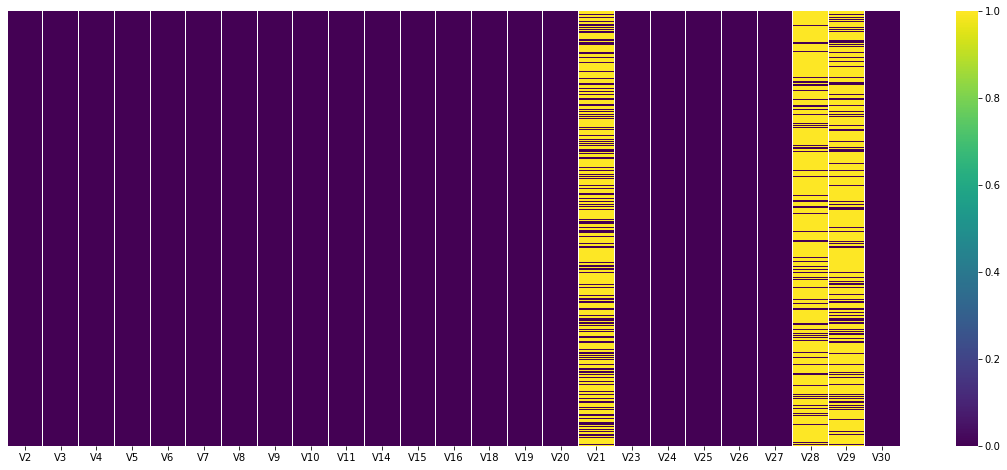

In [7]:
plt.figure(figsize=(20,8))
sns.heatmap(loan.isnull(), yticklabels=False, cmap='viridis')

**here we can see, a lot of data are missing in column V21, V28, V29**

so, we can drop these columns

In [8]:
loan= loan.drop(['V21', 'V28', 'V29'], axis=1)

In [9]:
loan.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V16,V18,V19,V20,V23,V24,V25,V26,V27,V30
0,0,0,24.0,0,57000.0,2120.0,2432.0,46500.0,24.0,3021.0,...,HOUSEWIFE,30-05-1974,0,1,1,2,0,0,0,0
1,0,1,24.0,1,33150.0,1461.0,1495.0,28168.0,24.0,3021.0,...,SELF,01-09-1967,0,1,1,2,0,0,0,0
2,0,0,26.0,0,56000.0,2745.0,1707.0,38900.0,30.0,3021.0,...,SELF,04-05-1983,2,1,7,8,16,31,44,0
3,0,0,24.0,0,49000.0,8003.0,2128.0,42900.0,24.0,3021.0,...,SAL,10-12-1989,0,1,1,3,0,0,0,0
4,0,0,27.0,0,54000.0,1852.0,1824.0,40900.0,30.0,3021.0,...,SAL,24-09-1984,0,1,1,1,0,0,0,0


now we have 22 columns

# Missing Data

In [10]:
loan.isnull().sum()

V2      0
V3      0
V4     19
V5      0
V6     19
V7     43
V8     19
V9     19
V10    19
V11    19
V14    19
V15    19
V16    19
V18    19
V19     0
V20     0
V23     0
V24     0
V25     0
V26     0
V27     0
V30     0
dtype: int64

**V2: First EMI Bounce (0 : No, 1: Yes) (existing loan)**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

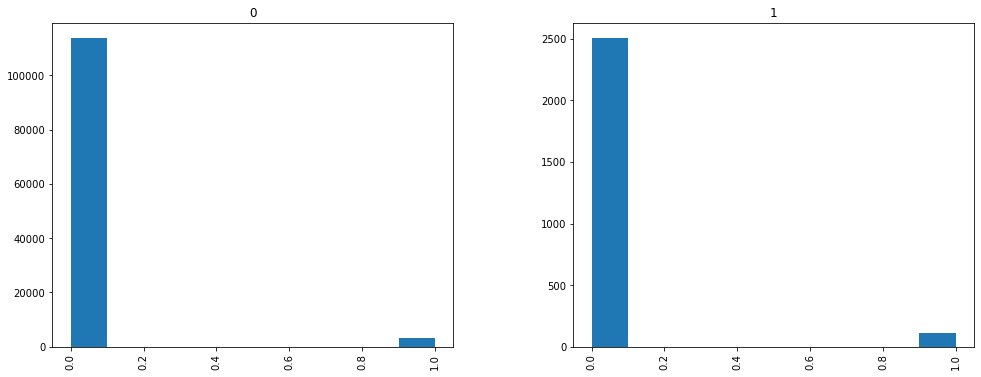

In [11]:
loan['V2'].hist(by=loan['V30'], figsize=(16,6))

**V3: Number of bounces in last 3 months Outside TVS Credit**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

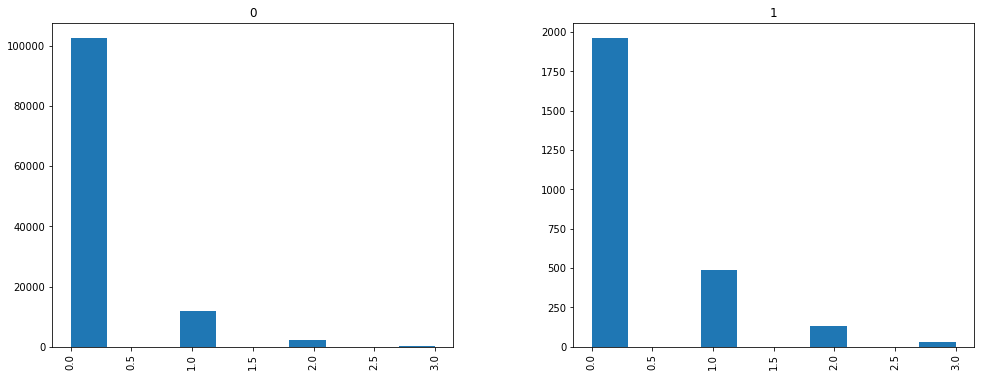

In [12]:
loan['V3'].hist(by=loan['V30'], figsize=(16,6))

**V4: MOB (Month of business with TVS Credit)**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

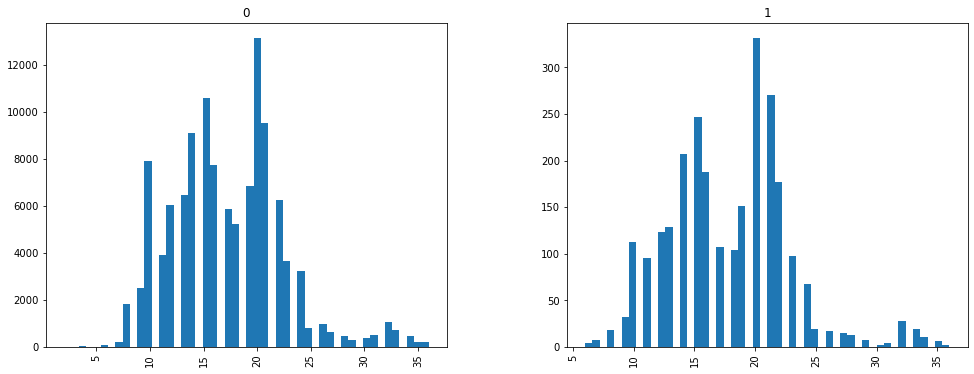

In [13]:
loan['V4'].hist(by=loan['V30'], figsize=(16,6), bins=50)

here we can see column_V4 (Month of business with TVS Credit) is normally distributed

so, we can fill the missing value by the mean of the existing values

In [14]:
loan['V4'].mean()

17.227455672794516

In [15]:
loan['V4'].fillna(loan['V4'].mean(), inplace=True)

In [16]:
loan['V4'].isnull().sum()

0

**V5: Number of bounces with TVS Credit**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

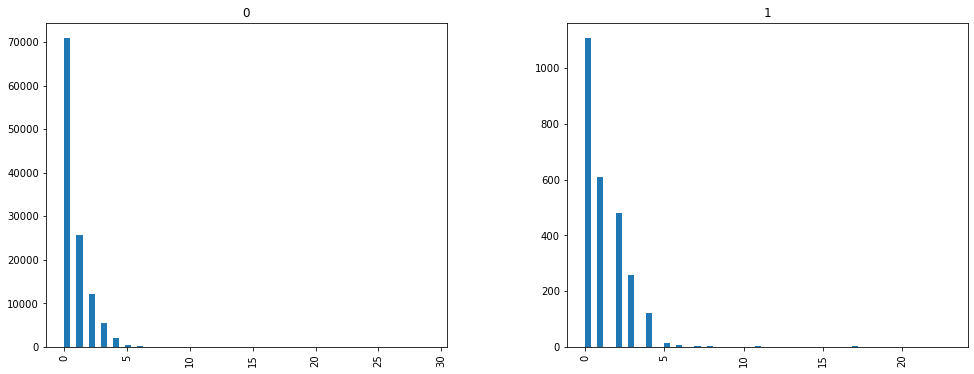

In [17]:
loan['V5'].hist(by=loan['V30'], figsize=(16,6), bins=60)

**V6: Cost of Asset (existing loan)**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

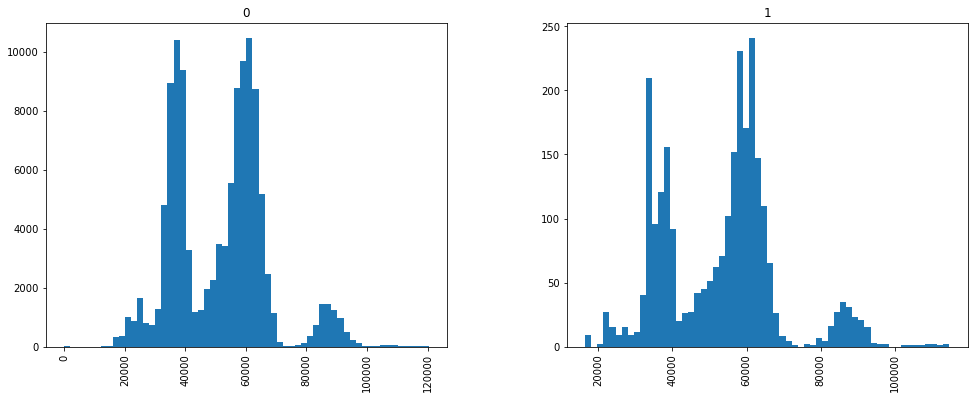

In [18]:
loan['V6'].hist(by=loan['V30'], figsize=(16,6), bins=60)

In [19]:
loan['V6'].mean()

51645.09623542997

In [20]:
loan['V6'].fillna(loan['V6'].mean(), inplace=True)

In [21]:
loan['V6'].isnull().sum()

0

**V7: Total down payment of existing loan**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

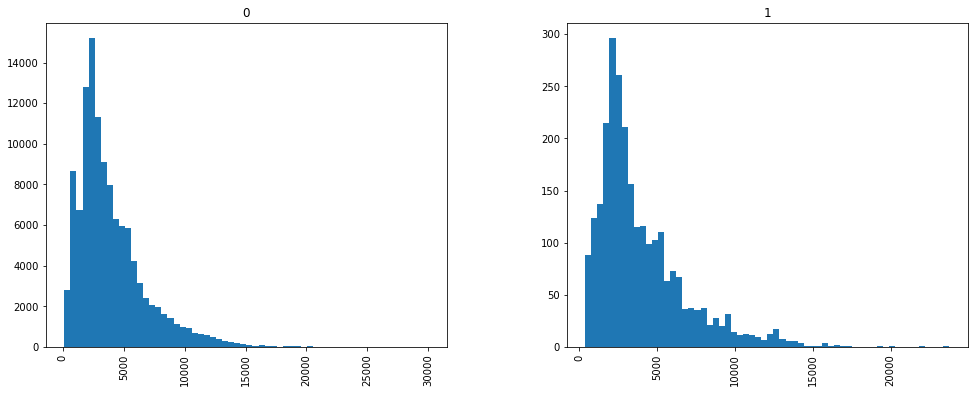

In [22]:
loan['V7'].hist(by=loan['V30'], figsize=(16,6), bins=60)

In [23]:
loan['V7'].mean()

3956.2664100096245

In [24]:
loan['V7'].fillna(loan['V7'].mean(), inplace=True)

In [25]:
loan['V7'].isnull().sum()

0

**V8: EMI of existing loan**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

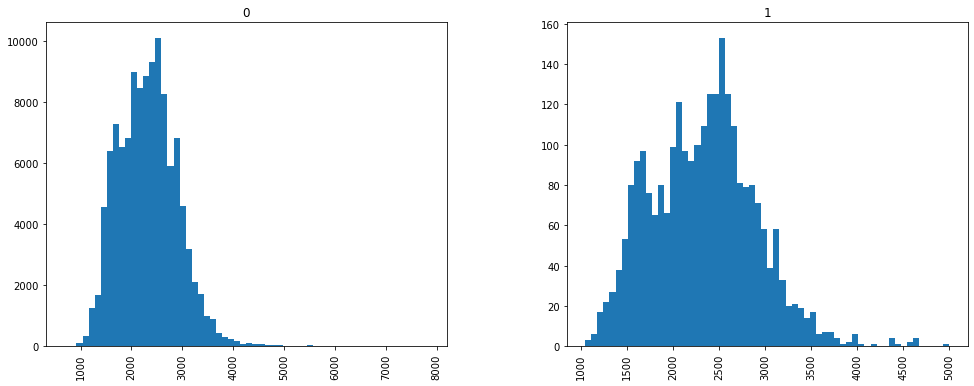

In [26]:
loan['V8'].hist(by=loan['V30'], figsize=(16,6), bins=60)

In [27]:
loan['V8'].mean()

2323.0675765005144

In [28]:
loan['V8'].fillna(loan['V8'].mean(), inplace=True)

In [29]:
loan['V8'].isnull().sum()

0

**V9: Total Loan amount of existing loan**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

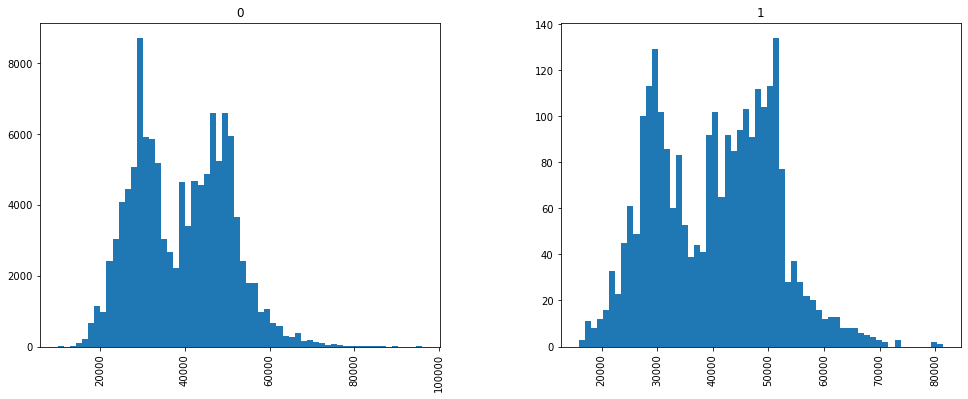

In [30]:
loan['V9'].hist(by=loan['V30'], figsize=(16,6), bins=60)

In [31]:
loan['V9'].mean()

39322.04032332293

In [32]:
loan['V9'].fillna(loan['V9'].mean(), inplace=True)

In [33]:
loan['V9'].isnull().sum()

0

**V10: Tenure of existing loan**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

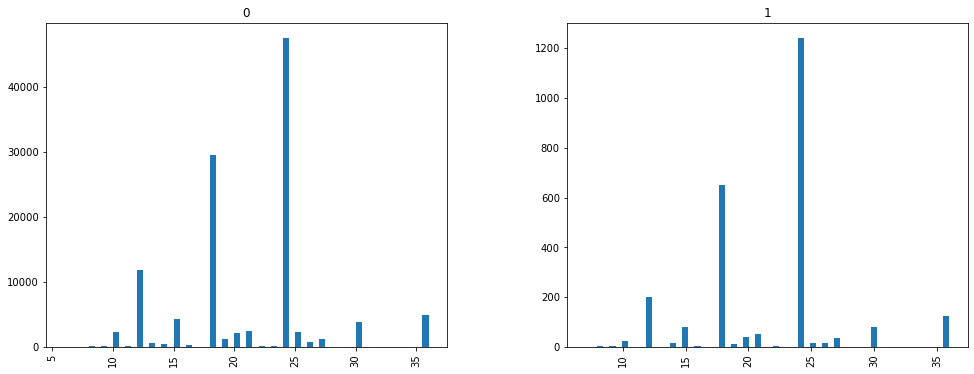

In [34]:
loan['V10'].hist(by=loan['V30'], figsize=(16,6), bins=60)

In [35]:
loan['V10'].mean()

21.076630211950565

In [36]:
loan['V10'].mode()

0    24.0
dtype: float64

In [37]:
loan['V10'].median()

24.0

In [38]:
loan['V10'].fillna(loan['V10'].median(), inplace=True)

In [39]:
loan['V10'].isnull().sum()

0

**V11: Customer's Geographical Area Code**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

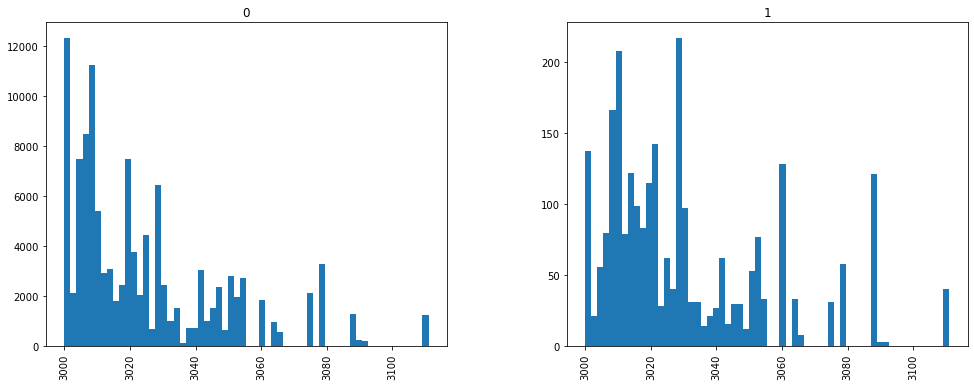

In [40]:
loan['V11'].hist(by=loan['V30'], figsize=(16,6), bins=60)

In [41]:
loan['V11'].mean()

3025.1057158875064

In [42]:
loan['V11'].median()

3019.0

In [43]:
loan['V11'].mode()

0    3009.0
dtype: float64

In [44]:
loan['V11'].fillna(loan['V11'].mode()[0], inplace=True)

In [45]:
loan['V11'].isnull().sum()

0

**V14: Rate of interest for existing loan**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

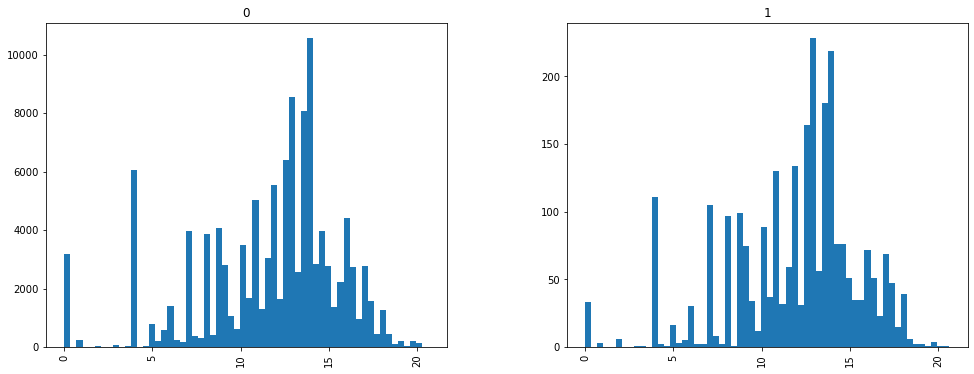

In [46]:
loan['V14'].hist(by=loan['V30'], figsize=(16,6), bins=60)

In [47]:
loan['V14'].mean()

11.717192261668123

In [48]:
loan['V14'].median()

12.7

In [49]:
loan['V14'].mode()

0    3.99
dtype: float64

In [50]:
loan['V14'].value_counts()

3.99     6030
13.00    5356
14.09    5311
13.50    4782
12.50    4545
         ... 
10.13       1
8.52        1
15.34       1
6.84        1
10.67       1
Name: V14, Length: 1105, dtype: int64

In [51]:
loan['V14'].fillna(loan['V14'].mean(), inplace=True)

In [52]:
loan['V14'].isnull().sum()

0

**V15: Gender**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

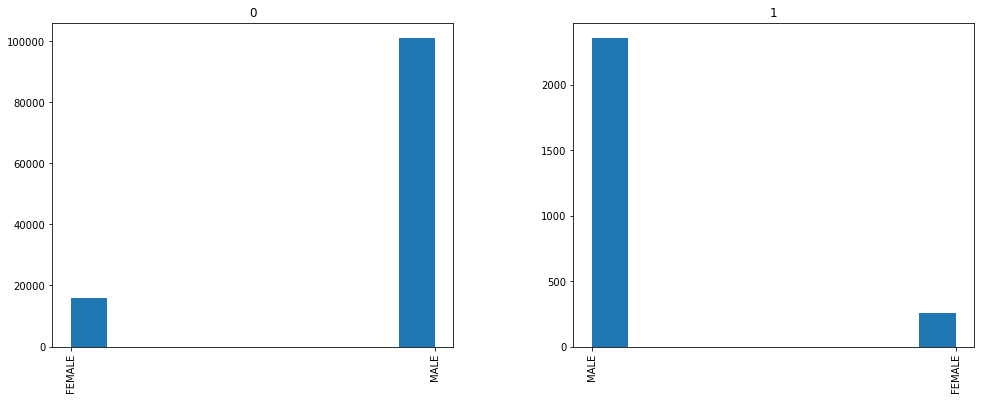

In [53]:
loan['V15'].hist(by=loan['V30'], figsize=(16,6))

In [54]:
loan['V15'].fillna(loan['V15'].mode()[0], inplace=True)

In [55]:
loan['V15'].isnull().sum()

0

just replace the Male with 0 and Female with 1

so that we can use this column in modeling

In [56]:
loan['V15'].replace('MALE',1,inplace=True)
loan['V15'].replace('FEMALE',0,inplace=True)

**V16: Employment type of customer (SAL: Salaried, SELF: Self-employed, HOUSEWIFE, PENS: Pensioner, STUDENT)**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

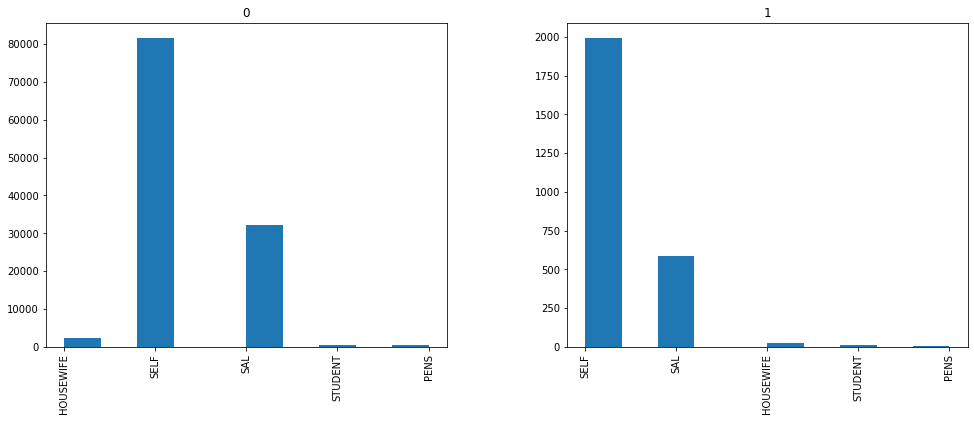

In [57]:
loan['V16'].hist(by=loan['V30'], figsize=(16,6))

In [58]:
loan['V16'].fillna(loan['V16'].mode()[0], inplace=True)

In [59]:
loan['V16'].isnull().sum()

0

In [60]:
df= pd.get_dummies(loan['V16'])
loan= pd.concat([loan, df], axis=1)

In [61]:
df

,HOUSEWIFE,PENS,SAL,SELF,STUDENT
0,1,0,0,0,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,1,0,0
4,0,0,1,0,0
...,...,...,...,...,...
119523,0,0,1,0,0
119524,0,0,0,1,0
119525,0,0,0,1,0
119526,0,0,0,1,0


In [62]:
loan.drop('V16', axis=1, inplace=True)

**V18: date of birth**

In [63]:
from datetime import date

loan['V18']= pd.to_datetime(loan['V18'], format='%d-%m-%Y')
loan['age']= 2020- loan['V18'].dt.year

now i am going to convert the column of date of bith into column of Age

In [64]:
loan.drop('V18', axis=1, inplace=True)

In [65]:
loan.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V25,V26,V27,V30,HOUSEWIFE,PENS,SAL,SELF,STUDENT,age
0,0,0,24.0,0,57000.0,2120.0,2432.0,46500.0,24.0,3021.0,...,0,0,0,0,1,0,0,0,0,46.0
1,0,1,24.0,1,33150.0,1461.0,1495.0,28168.0,24.0,3021.0,...,0,0,0,0,0,0,0,1,0,53.0
2,0,0,26.0,0,56000.0,2745.0,1707.0,38900.0,30.0,3021.0,...,16,31,44,0,0,0,0,1,0,37.0
3,0,0,24.0,0,49000.0,8003.0,2128.0,42900.0,24.0,3021.0,...,0,0,0,0,0,0,1,0,0,31.0
4,0,0,27.0,0,54000.0,1852.0,1824.0,40900.0,30.0,3021.0,...,0,0,0,0,0,0,1,0,0,36.0


In [66]:
loan['age'].isnull().sum()

19

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

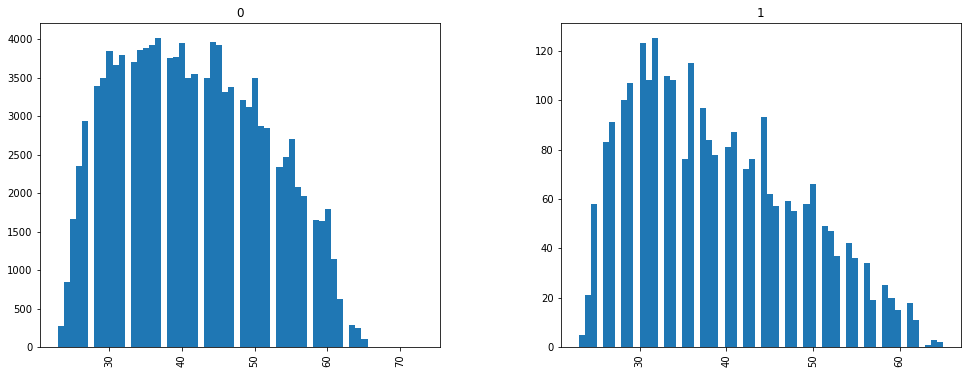

In [67]:
loan['age'].hist(by=loan['V30'], figsize=(16,6), bins=60)

In [68]:
loan['age'].isnull().sum()

19

In [69]:
loan['age'].mean()

41.43725577153185

In [70]:
loan['age'].mode()

0    37.0
dtype: float64

In [71]:
loan['age'].fillna(loan['age'].mode()[0], inplace=True)

In [72]:
loan['age'].isnull().sum()

0

**V19: no. of live loans**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

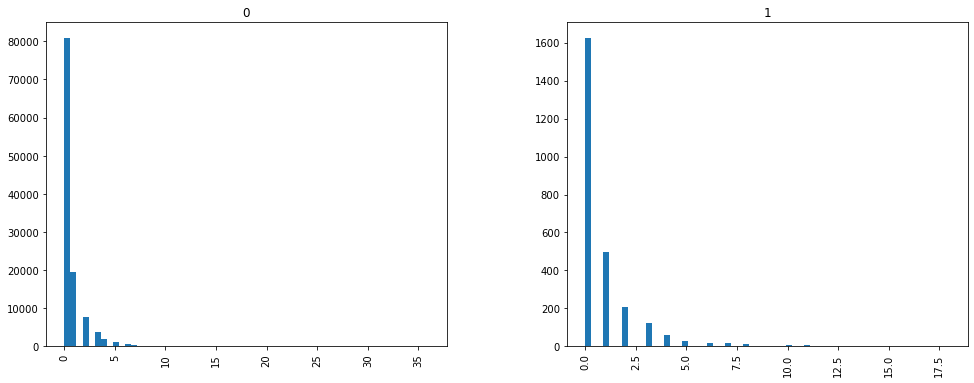

In [73]:
loan['V19'].hist(by=loan['V30'], figsize=(16,6), bins=60)

**V20: Number of Two Wheeler loans**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

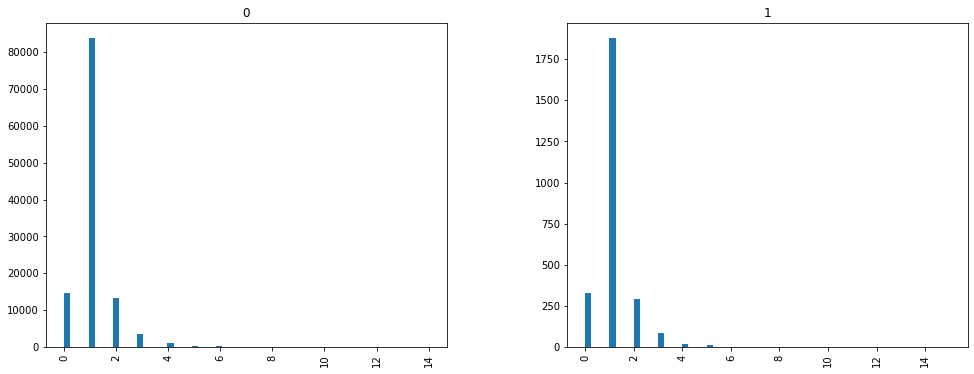

In [74]:
loan['V20'].hist(by=loan['V30'], figsize=(16,6), bins=60)

**V23: Number of closed loans**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

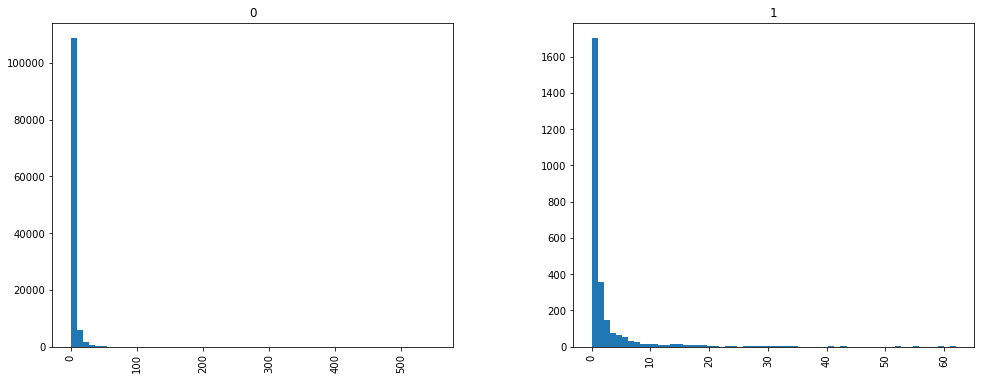

In [75]:
loan['V23'].hist(by=loan['V30'], figsize=(16,6), bins=60)

**V24: Number of enquiries**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

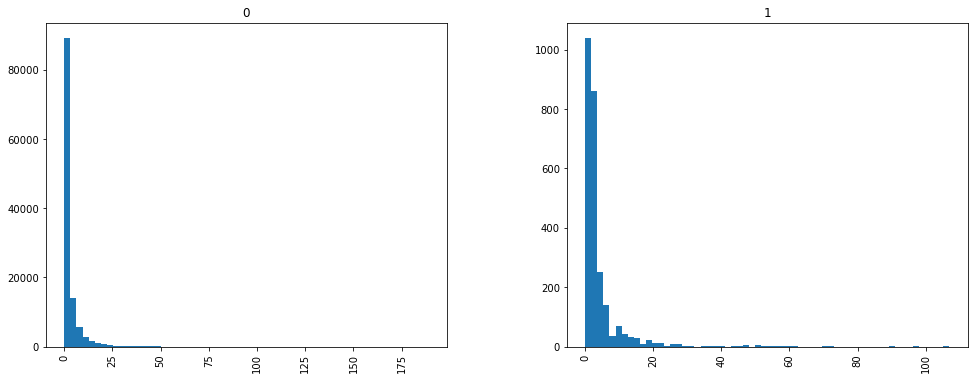

In [76]:
loan['V24'].hist(by=loan['V30'], figsize=(16,6), bins=60)

**V25: Number of times defaulted in last 3 months**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

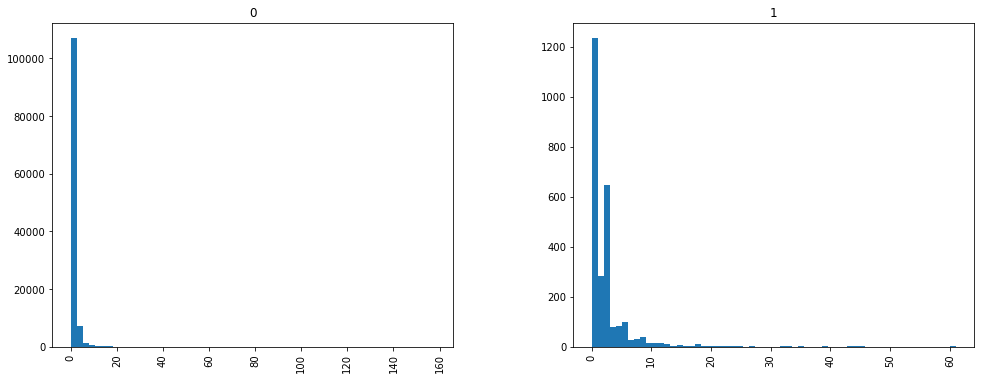

In [77]:
loan['V25'].hist(by=loan['V30'], figsize=(16,6), bins=60)

**V26: Number of times defaulted in last 6 months**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

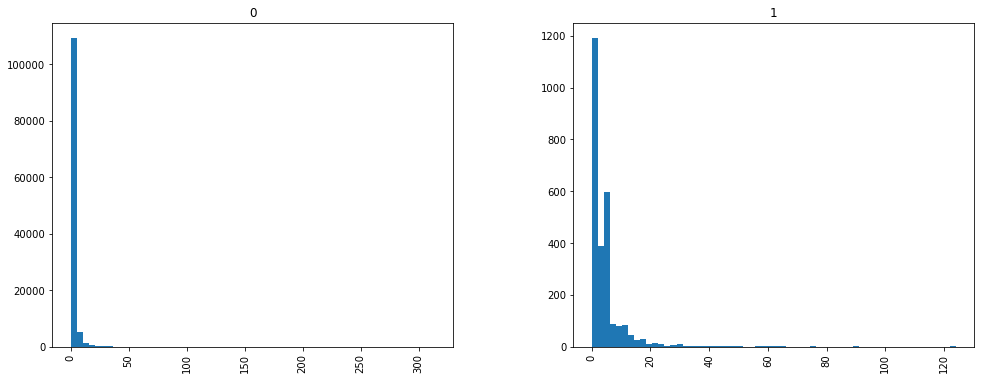

In [78]:
loan['V26'].hist(by=loan['V30'], figsize=(16,6), bins=60)

**V27: Number of times defaulted in last 12 months**

array([<AxesSubplot:title={'center':'0'}>,
       <AxesSubplot:title={'center':'1'}>], dtype=object)

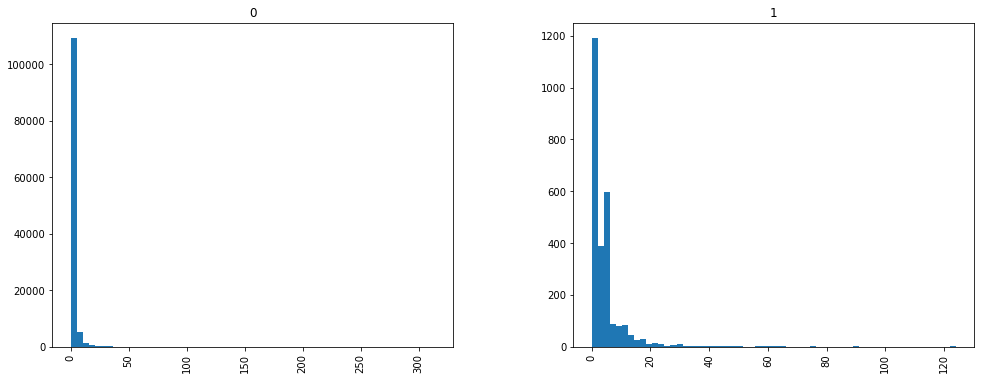

In [79]:
loan['V26'].hist(by=loan['V30'], figsize=(16,6), bins=60)

In [80]:
loan.isnull().sum()

V2           0
V3           0
V4           0
V5           0
V6           0
V7           0
V8           0
V9           0
V10          0
V11          0
V14          0
V15          0
V19          0
V20          0
V23          0
V24          0
V25          0
V26          0
V27          0
V30          0
HOUSEWIFE    0
PENS         0
SAL          0
SELF         0
STUDENT      0
age          0
dtype: int64

**reduce the dimension by using correlation**

<AxesSubplot:>

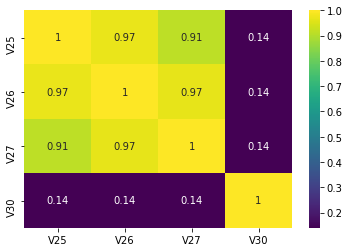

In [81]:
sns.heatmap(loan[['V25', 'V26', 'V27', 'V30']].corr(), annot=True, cmap='viridis')

here we can see there is a strong correlation between column V25 and V26   (0.97)

so we can drop column V25

In [82]:
loan= loan.drop(['V25'], axis=1)

**now understand the column V8, V9, V10**

In [83]:
loan['V9/V10']= loan['V9']/loan['V10']

<AxesSubplot:>

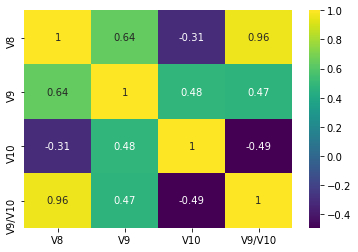

In [84]:
sns.heatmap(loan[['V8', 'V9', 'V10', 'V9/V10']].corr(), annot=True, cmap='viridis')

* V8: EMI of existing loan
* V9: Total Loan amount of existing loan
* V10: Tenure of existing loan

here we are observing that the column V9/V10 are strongly correlated with column V8


In [85]:
loan.drop(['V9/V10'], axis=1, inplace=True)

In [86]:
loan.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V24,V26,V27,V30,HOUSEWIFE,PENS,SAL,SELF,STUDENT,age
0,0,0,24.0,0,57000.0,2120.0,2432.0,46500.0,24.0,3021.0,...,2,0,0,0,1,0,0,0,0,46.0
1,0,1,24.0,1,33150.0,1461.0,1495.0,28168.0,24.0,3021.0,...,2,0,0,0,0,0,0,1,0,53.0
2,0,0,26.0,0,56000.0,2745.0,1707.0,38900.0,30.0,3021.0,...,8,31,44,0,0,0,0,1,0,37.0
3,0,0,24.0,0,49000.0,8003.0,2128.0,42900.0,24.0,3021.0,...,3,0,0,0,0,0,1,0,0,31.0
4,0,0,27.0,0,54000.0,1852.0,1824.0,40900.0,30.0,3021.0,...,1,0,0,0,0,0,1,0,0,36.0


In [87]:
loan.shape

(119528, 25)

# Exploratory Data Analysis

<AxesSubplot:>

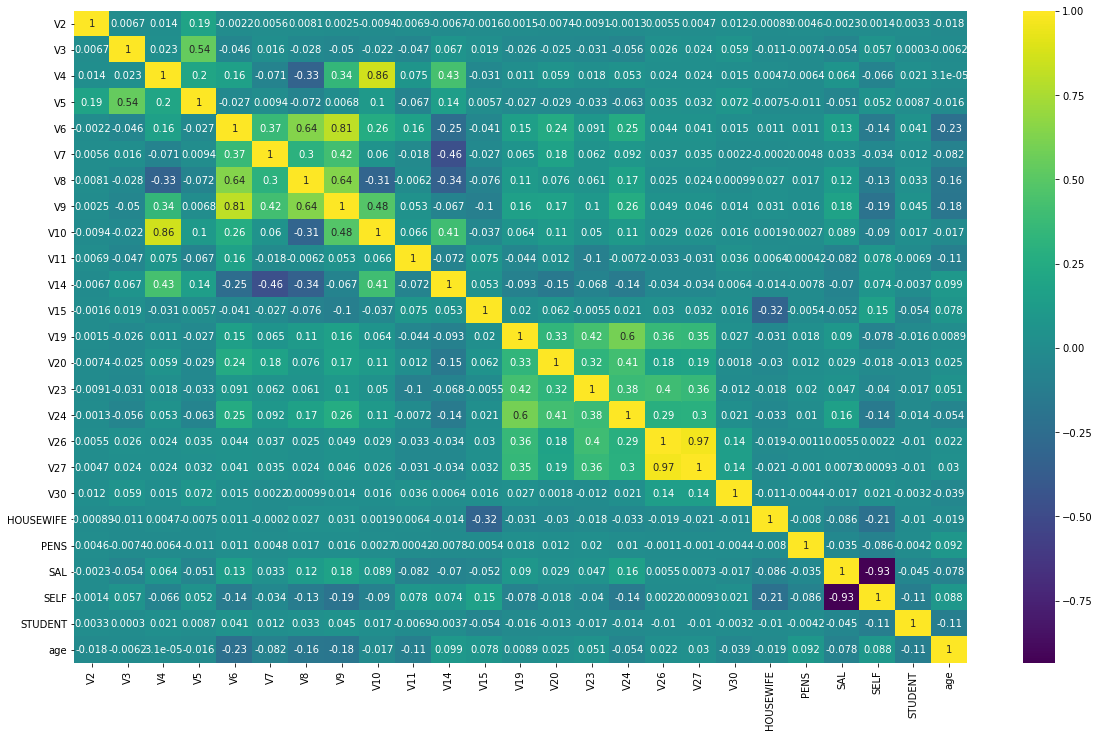

In [88]:
plt.figure(figsize=(20,12))
sns.heatmap(loan.corr(), cmap='viridis', annot=True)

# Check distribution of target class

[Text(0, 0, 'Good customers'), Text(1, 0, 'Bad customers')]

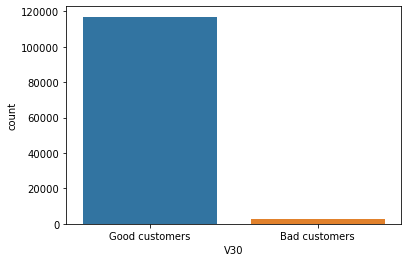

In [89]:
g= sns.countplot(loan['V30'])
g.set_xticklabels(['Good customers','Bad customers'])

In [90]:
# class count
class_count_0, class_count_1 = loan['V30'].value_counts()

# Separate class
class_0 = loan[loan['V30'] == 0]
class_1 = loan[loan['V30'] == 1]# print the shape of the class
print('class 0:', class_0.shape)
print('class 1:', class_1.shape)

class 0: (116914, 25)
class 1: (2614, 25)


In [91]:
loan['V30'].value_counts()

0    116914
1      2614
Name: V30, dtype: int64

since our target variable is not well distributed

so we will resample our dataset by using under sampling and over sampling

# over sampling

**1. Random Over-Sampling**

total class of 1 and 0:

 1    116914
0    116914
Name: V30, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

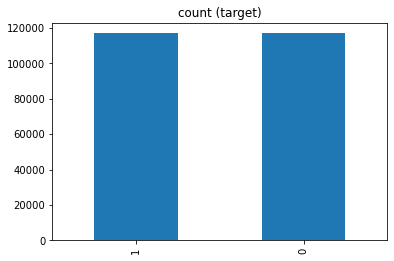

In [92]:
class_1_over = class_1.sample(class_count_0, replace=True)

test_over = pd.concat([class_1_over, class_0], axis=0)

print("total class of 1 and 0:\n\n",test_over['V30'].value_counts())

# plot the count after over-sampeling
test_over['V30'].value_counts().plot(kind='bar', title='count (target)')

In [93]:
test_over

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V24,V26,V27,V30,HOUSEWIFE,PENS,SAL,SELF,STUDENT,age
45172,0,0,15.0,0,23000.0,600.0,1548.0,23000.0,18.0,3010.0,...,0,0,0,1,0,0,0,1,0,47.0
3332,0,2,32.0,6,52571.0,2420.0,1827.0,42000.0,36.0,3020.0,...,1,3,3,1,0,0,0,1,0,37.0
52983,0,0,11.0,0,67000.0,1940.0,3210.0,36000.0,12.0,3038.0,...,3,7,14,1,0,0,0,1,0,51.0
42681,0,0,15.0,0,37000.0,1826.0,1626.0,26900.0,20.0,3051.0,...,1,10,15,1,0,0,0,1,0,37.0
76611,0,0,16.0,0,42900.0,1008.0,2888.0,42900.0,18.0,3018.0,...,0,0,0,1,0,0,0,1,0,41.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119522,0,0,13.0,0,62000.0,3575.0,3495.0,54000.0,18.0,3111.0,...,20,4,9,0,0,0,0,1,0,58.0
119523,0,1,10.0,1,37400.0,1440.0,3578.0,37400.0,12.0,3005.0,...,0,0,0,0,0,0,1,0,0,45.0
119525,0,0,17.0,0,83000.0,850.0,1514.0,22000.0,18.0,3025.0,...,0,0,0,0,0,0,0,1,0,38.0
119526,0,0,20.0,2,91425.0,3022.0,2275.0,43600.0,24.0,3054.0,...,4,0,0,0,0,0,0,1,0,32.0


**2. Random over-sampling with imblearn**

In [94]:
X= loan.drop(['V30'], axis=1)
y= loan['V30']

In [95]:
from imblearn.over_sampling import RandomOverSampler

ros= RandomOverSampler(random_state=42)
X_ros, y_ros= ros.fit_resample(X,y)

print('Original dataset shape\n', y.value_counts(), '\n')
print('Resample dataset shape\n', pd.DataFrame(y_ros).value_counts())

Original dataset shape
 0    116914
1      2614
Name: V30, dtype: int64 

Resample dataset shape
 V30
1      116914
0      116914
dtype: int64


**3. Synthetic Minority Oversampling Technique (SMOTE)**

In [96]:
# import library
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# fit predictor and target variable
X_smote, y_smote = smote.fit_resample(X, y)


print('Original dataset shape\n', y.value_counts(), '\n')
print('Resample dataset shape\n', pd.DataFrame(y_smote).value_counts())

Original dataset shape
 0    116914
1      2614
Name: V30, dtype: int64 

Resample dataset shape
 V30
1      116914
0      116914
dtype: int64


# under sampling

**1. Random Under-Sampling**

total class of 1 and 0:

 1    2614
0    2614
Name: V30, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

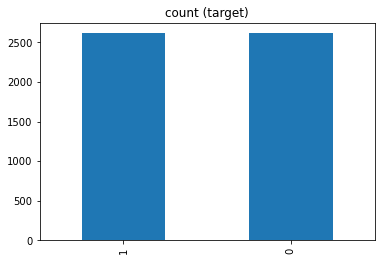

In [97]:
class_0_under = class_0.sample(class_count_1)

test_under = pd.concat([class_0_under, class_1], axis=0)

print("total class of 1 and 0:\n\n",test_under['V30'].value_counts())# plot the count after under-sampeling
test_under['V30'].value_counts().plot(kind='bar', title='count (target)')

In [98]:
test_under

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,...,V24,V26,V27,V30,HOUSEWIFE,PENS,SAL,SELF,STUDENT,age
116451,0,0,15.0,0,37000.0,6694.0,1623.0,29900.0,21.0,3011.0,...,2,0,0,0,0,0,1,0,0,61.0
116311,1,0,19.0,1,55372.0,3100.0,2473.0,43000.0,21.0,3001.0,...,2,0,0,0,0,0,0,1,0,55.0
81707,0,1,9.0,1,60506.0,4835.0,3100.0,31000.0,10.0,3014.0,...,2,0,0,0,0,0,0,1,0,39.0
35266,0,1,19.0,3,61523.0,5483.0,2585.0,47000.0,24.0,3006.0,...,1,0,0,0,0,0,0,1,0,40.0
55888,0,0,17.0,1,59000.0,2075.0,3328.0,49900.0,18.0,3030.0,...,3,0,0,0,0,0,0,1,0,43.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119382,0,0,25.0,1,64879.0,5499.0,2519.0,57900.0,30.0,3000.0,...,3,2,2,1,0,0,1,0,0,29.0
119459,0,0,17.0,0,42900.0,1008.0,2888.0,42900.0,18.0,3012.0,...,0,0,0,1,0,0,0,1,0,55.0
119483,0,0,9.0,0,40545.0,4560.0,2500.0,25000.0,10.0,3008.0,...,0,2,2,1,0,0,0,1,0,56.0
119505,0,0,20.0,2,58500.0,9456.0,1933.0,43400.0,27.0,3010.0,...,1,9,15,1,0,0,1,0,0,29.0


**2. Random under-sampling with imblearn**

In [99]:
from imblearn.under_sampling import RandomUnderSampler

rus= RandomUnderSampler(random_state=42, replacement=True,)
X_rus, y_rus= rus.fit_resample(X, y)

print('Original dataset shape\n', y.value_counts(), '\n')
print('Resample dataset shape\n', pd.DataFrame(y_rus).value_counts())

Original dataset shape
 0    116914
1      2614
Name: V30, dtype: int64 

Resample dataset shape
 V30
1      2614
0      2614
dtype: int64


**3. NearMiss**

In [100]:
from imblearn.under_sampling import NearMiss

In [101]:
nm= NearMiss()
X_nm, y_nm= nm.fit_resample(X, y)

print('Original dataset shape\n', y.value_counts(), '\n')
print('Resample dataset shape\n', pd.DataFrame(y_nm).value_counts())

Original dataset shape
 0    116914
1      2614
Name: V30, dtype: int64 

Resample dataset shape
 V30
1      2614
0      2614
dtype: int64


**now, we have done under sampling and over sampling on our imbalanced target variables**

we can use any resampled data.

so, let's use the under sampled data by NearMiss

# splitting the data

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, confusion_matrix, classification_report

In [104]:
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.33, random_state=42)

# performance metric
Accuracy is not the best metric to use when evaluating imbalanced datasets as it can be misleading.

Metrics that can provide better insight are:

* **Confusion Matrix**: a table showing correct predictions and types of incorrect predictions.
* **Precision**: the number of true positives divided by all positive predictions. Precision is also called Positive Predictive Value. It is a measure of a classifier’s exactness. Low precision indicates a high number of false positives.
* **Recall**: the number of true positives divided by the number of positive values in the test data. The recall is also called Sensitivity or the True Positive Rate. It is a measure of a classifier’s completeness. Low recall indicates a high number of false negatives.
* **F1: Score**: the weighted average of precision and recall.
* **Area Under ROC Curve (AUROC)**: AUROC represents the likelihood of your model distinguishing observations from two classes.
In other words, if you randomly select one observation from each class, what’s the probability that your model will be able to “rank” them correctly?

# model prediction

**1. Support Vector**

In [105]:
from sklearn.svm import SVC

In [106]:
# we can add class_weight='balanced' to add panalize mistake
svc_model = SVC(class_weight='balanced', probability=True)

svc_model.fit(X_train, y_train)

svc_predict = svc_model.predict(X_test)# check performance
print('ROCAUC score:',roc_auc_score(y_test, svc_predict))
print('Accuracy score:',accuracy_score(y_test, svc_predict))
print('F1 score:',f1_score(y_test, svc_predict))
print('\n')
print('Confusion matrix: \n', confusion_matrix(y_test, svc_predict))

ROCAUC score: 0.9281497754764413
Accuracy score: 0.9281575898030128
F1 score: 0.927400468384075


Confusion matrix: 
 [[810  62]
 [ 62 792]]


**2. Logistic Regression**

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
log_model= LogisticRegression()

# fit the predictor and target
log_model.fit(X_train, y_train)

# predict
log_predict= log_model.predict(X_test)

# check performance
print('ROCAUC score:',roc_auc_score(y_test, log_predict))
print('Accuracy score:',accuracy_score(y_test, log_predict))
print('F1 score:',f1_score(y_test, log_predict))
print('\n')
print('Confusion matrix: \n', confusion_matrix(y_test, log_predict))

ROCAUC score: 0.9318855681842597
Accuracy score: 0.9322132097334879
F1 score: 0.9293051359516616


Confusion matrix: 
 [[840  32]
 [ 85 769]]


**3. Random Forest Classifier**

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(X_train, y_train)

# predict
rfc_predict = rfc.predict(X_test)

# check performance
print('ROCAUC score:',roc_auc_score(y_test, rfc_predict))
print('Accuracy score:',accuracy_score(y_test, rfc_predict))
print('F1 score:',f1_score(y_test, rfc_predict))
print('\n')
print('Confusion matrix: \n', confusion_matrix(y_test, rfc_predict))

print('\n')
print('Classifiation report: \n', classification_report(y_test, rfc_predict))

ROCAUC score: 0.9725912059815653
Accuracy score: 0.9727694090382387
F1 score: 0.9720071471113759


Confusion matrix: 
 [[863   9]
 [ 38 816]]


Classifiation report: 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       872
           1       0.99      0.96      0.97       854

    accuracy                           0.97      1726
   macro avg       0.97      0.97      0.97      1726
weighted avg       0.97      0.97      0.97      1726



# Conclusion